<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [16]:
data = pd.read_csv('./train.csv')



In [17]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [18]:
#посмотреть на данные, чтобы понимать с чем мы имеем дело 
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

пропусков в данных нет , но переменная TotalSpent относится к классу object а должна быть классом float это следует поправить

In [20]:
data["TotalSpent"][data['TotalSpent'] ==' '].count()
#а вот и пробелы

9

In [23]:
data[data['TotalSpent'] ==' '][target_col]

1048    0
1707    0
2543    0
3078    0
3697    0
4002    0
4326    0
4551    0
4598    0
Name: Churn, dtype: int64

In [25]:
data["TotalSpent"][data['TotalSpent'] ==' '] = np.nan

data["TotalSpent"] = data["TotalSpent"].astype('float64') 
#получается что пропуски все таки есть и их можно заметить например нулем потому что у нас всеравно данный клиент ушел 

data.TotalSpent= data.TotalSpent.fillna(0) #попробую удалить пропуски в данных

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Числовые переменные

0 ClientPeriod
1 MonthlySpending
2 TotalSpent


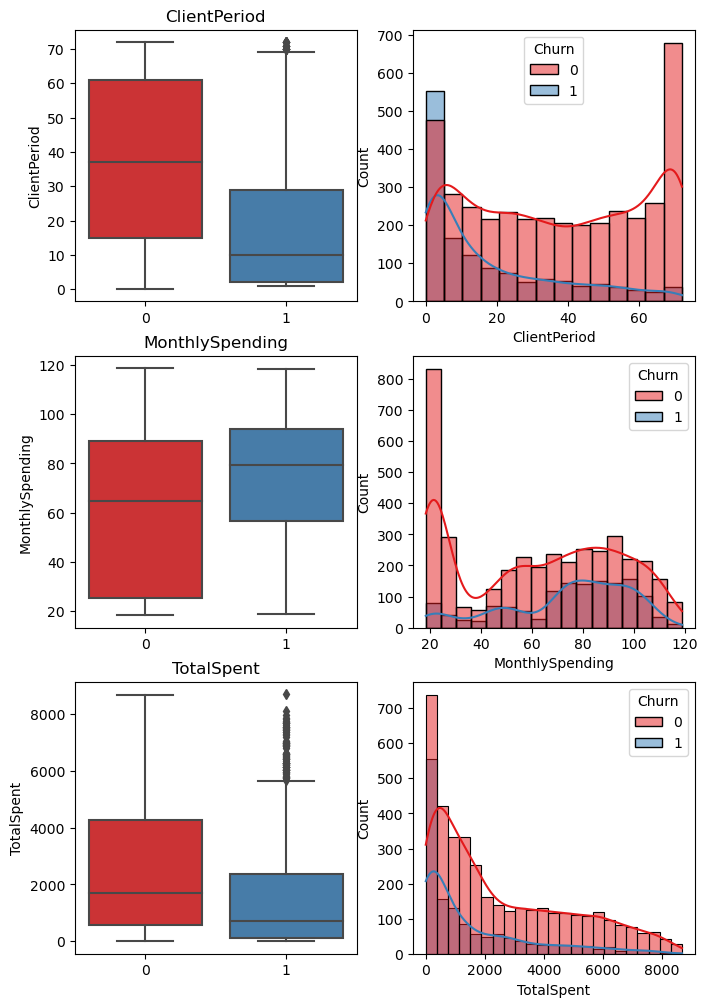

In [26]:

fig, ax = plt.subplots( len(num_cols),2, figsize = (8,12))


for ind, variable in enumerate(num_cols):
    print(ind, variable)
    sns.boxplot(data = data,  y = variable,x = target_col, palette='Set1',ax = ax[ind,0])
    sns.histplot(data = data, hue = target_col, x = variable, palette='Set1',ax = ax[ind, 1], kde=True)

    ax[ind,0].set_title(variable)
    ax[ind,0].set_xlabel('')




вывод из числовых переменных следующий, исходные данные далеки от нормального распределния, возможно есть смысл их стандартизировать 

In [46]:
data[num_cols+[target_col]].groupby(target_col).describe().T

Churn                            0            1
ClientPeriod    count  3898.000000  1384.000000
                mean     37.525911    17.951590
                std      24.123750    19.460135
                min       0.000000     1.000000
                25%      15.000000     2.000000
                50%      37.000000    10.000000
                75%      61.000000    29.000000
                max      72.000000    72.000000
MonthlySpending count  3898.000000  1384.000000
                mean     61.602719    74.281178
                std      31.272608    24.551353
                min      18.250000    18.950000
                25%      25.100000    56.437500
                50%      64.775000    79.500000
                75%      89.100000    94.200000
                max     118.750000   118.350000
TotalSpent      count  3898.000000  1384.000000
                mean   2557.914469  1525.831864
                std    2332.736235  1881.443058
                min       0.000000    19.100000
                25%     564.462500   134.650000
                50%    1709.125000   706.725000
                75%    4273.600000  2352.550000
                max    8672.450000  8684.800000

## Категориальные переменные

In [27]:
pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts()).rename(columns={0: 'counts'}).sort_values(by=['column', 'counts'])


counts
column                   value                            
HasChild                 Yes                          1606
                         No                           3676
HasContractPhone         One year                     1082
                         Two year                     1280
                         Month-to-month               2920
HasDeviceProtection      No internet service          1141
                         Yes                          1824
                         No                           2317
HasInternetService       No                           1141
                         DSL                          1800
                         Fiber optic                  2341
HasMovieSubscription     No internet service          1141
                         Yes                          2060
                         No                           2081
HasMultiplePhoneNumbers  No phone service              521
                         Yes                          2250
                         No                           2511
HasOnlineBackup          No internet service          1141
                         Yes                          1809
                         No                           2332
HasOnlineSecurityService No internet service          1141
                         Yes                          1529
                         No                           2612
HasOnlineTV              No internet service          1141
                         Yes                          2042
                         No                           2099
HasPartner               Yes                          2577
                         No                           2705
HasPhoneService          No                            521
                         Yes                          4761
HasTechSupportAccess     No internet service          1141
                         Yes                          1537
                         No                           2604
IsBillingPaperless       No                           2134
                         Yes                          3148
IsSeniorCitizen          1                             842
                         0                            4440
PaymentMethod            Credit card (automatic)      1143
                         Bank transfer (automatic)    1159
                         Mailed check                 1194
                         Electronic check             1786
Sex                      Female                       2627
                         Male                         2655

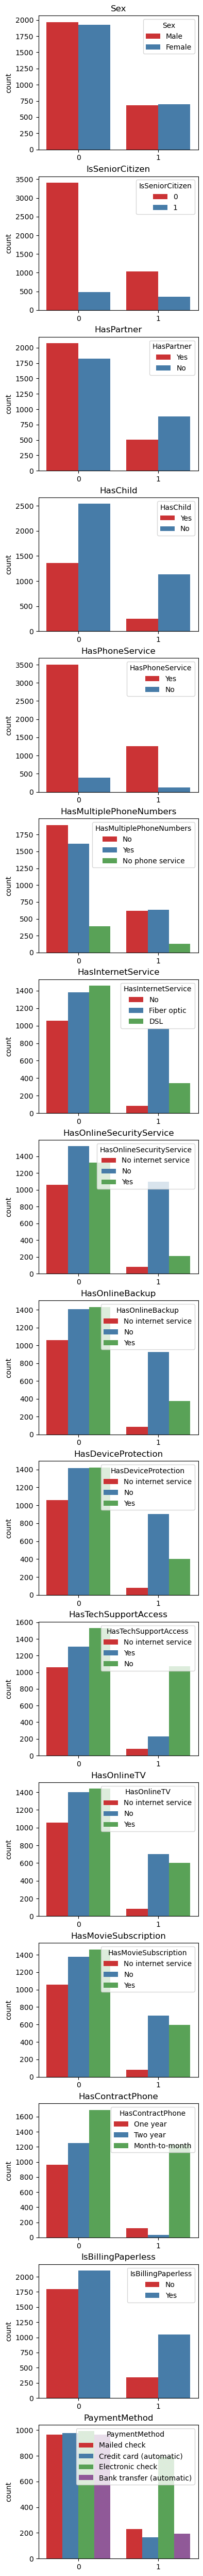

In [28]:

fig, ax = plt.subplots( len(cat_cols),1, figsize = (4,len(cat_cols) * 4))


for ind, variable in enumerate(cat_cols):
    sns.countplot(data=data, x=target_col, hue=variable,  palette='Set1',ax = ax[ind])


    ax[ind].set_title(variable)
    ax[ind].set_xlabel('')


однозначно наблюдается сильный дисбаланс классов по искомой переменной , необходимо уравновесить выборку 

In [42]:
from imblearn.over_sampling import RandomOverSampler

resample = RandomOverSampler()
data_resample , target_colum_resample=  resample.fit_resample(data[feature_cols], data[target_col] )
target_colum_resample.value_counts()

data_resample["Churn"] = target_colum_resample

0    3898
1    3898
Name: Churn, dtype: int64

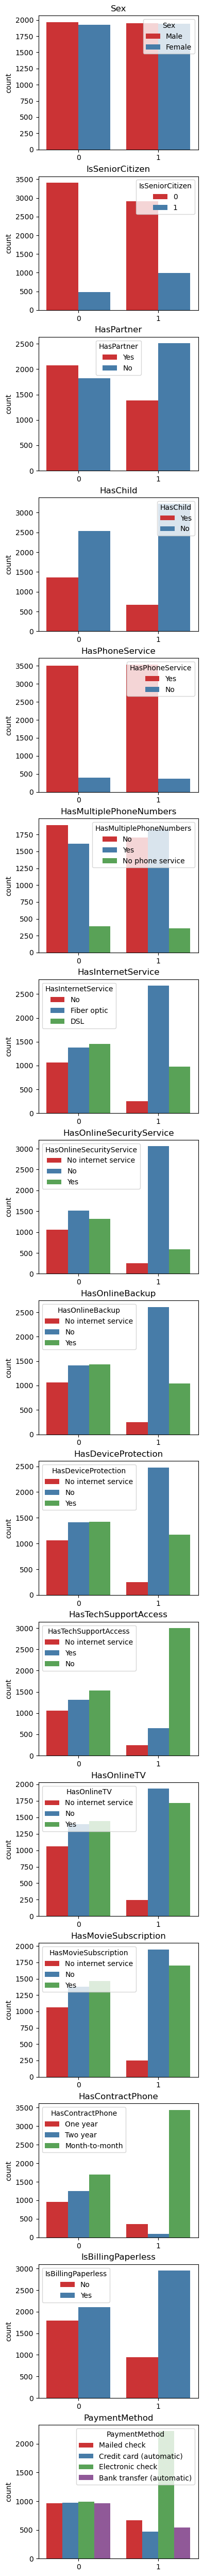

In [45]:
fig, ax = plt.subplots( len(cat_cols),1, figsize = (4,len(cat_cols) * 4))


for ind, variable in enumerate(cat_cols):
    sns.countplot(data=data_resample, x=target_col, hue=variable,  palette='Set1',ax = ax[ind])


    ax[ind].set_title(variable)
    ax[ind].set_xlabel('')

после ресемпла по категориям стало значительно лучше 

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [48]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data_resample[feature_cols], data_resample[target_col], test_size=0.2, random_state=0)

numeric_transformer = make_pipeline(StandardScaler(), MinMaxScaler() )
cat_transformer = make_pipeline( OneHotEncoder())
preprocessor = ColumnTransformer(
    transformers =[
        ('cat', cat_transformer, cat_cols),
        ('num',numeric_transformer, num_cols),
        
    ]
)
model_params = {
    "logisticregression__C" : [100, 10, 1, 0.1, 0.01, 0.001]
}

clf = make_pipeline(preprocessor, LogisticRegression())

GS = GridSearchCV(clf, model_params, cv = 10,scoring ="roc_auc" ,  n_jobs =-1  )



best_model = GS.fit(X_train, y_train)

print(f"roc_auc скор на тренировочной выборке {GS.best_score_}")
print(f"roc_auc скор на тестовой выборке выборке {GS.score(X_test, y_test)}")


roc_auc скор на тренировочной выборке 0.840046344399753
roc_auc скор на тестовой выборке выборке 0.8545277324847466


на тестовой выборке очень неплохой скор который даже укладывается в 5 баллов на степике:)

In [54]:


test = pd.read_csv('test.csv')
test["TotalSpent"][test['TotalSpent'] ==' '] = np.nan
test["TotalSpent"] = test["TotalSpent"].astype('float64') 
#получается что пропуски все таки есть и их можно заметить например медианой 
test.TotalSpent= test.TotalSpent.fillna(1)


sub_result = GS.predict(test)



sub = pd.read_csv('submission.csv')
sub['Churn'] = sub_result

sub.to_csv('submission.csv' , index = False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [53]:
print(f"лучшее качество на тестовой выборке  {round(GS.score(X_test, y_test), 2)}")
print(f'лучшая модель на параметрах {GS.best_params_}')

лучшее качество на тестовой выборке  0.85
лучшая модель на параметрах {'logisticregression__C': 100}


X_test

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [56]:
from catboost import CatBoostClassifier
from catboost import grid_search



In [82]:
grid = {'iterations': [100,200,300,500],
        'learning_rate': [0.5 * (10 ** (-i)) for i in range(2,5) ],
        "l2_leaf_reg" : [0.1, 0.5, 1, 10, 20, 50],
        "depth" : [4, 6, 8, 10, 15]
        }

model = CatBoostClassifier(cat_features = cat_cols)

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6911591	test: 0.6911974	best: 0.6911974 (0)	total: 13.1ms	remaining: 13.1s
1:	learn: 0.6893242	test: 0.6894653	best: 0.6894653 (1)	total: 28.6ms	remaining: 14.3s
2:	learn: 0.6872727	test: 0.6875593	best: 0.6875593 (2)	total: 45.8ms	remaining: 15.2s
3:	learn: 0.6853200	test: 0.6855089	best: 0.6855089 (3)	total: 62.7ms	remaining: 15.6s
4:	learn: 0.6831229	test: 0.6833278	best: 0.6833278 (4)	total: 77.8ms	remaining: 15.5s
5:	learn: 0.6811226	test: 0.6813612	best: 0.6813612 (5)	total: 110ms	remaining: 18.3s
6:	learn: 0.6791031	test: 0.6793558	best: 0.6793558 (6)	total: 129ms	remaining: 18.3s
7:	learn: 0.6769954	test: 0.6772877	best: 0.6772877 (7)	total: 141ms	remaining: 17.5s
8:	learn: 0.6752206	test: 0.6755177	best: 0.6755177 (8)	total: 154ms	remaining: 16.9s
9:	learn: 0.6732199	test: 0.6735626	best: 0.6735626 (9)	total: 167ms	remaining: 16.5s
10:	learn: 0.6712263	test: 0.6715412	best: 0.6715412 (10)	total: 182ms	remaining: 16.3s
11:	learn: 0.6693780	test: 0.6697709	best: 0.66

KeyboardInterrupt: 

In [ ]:
'max_depth': [i for i in range(2,22,2)]

In [71]:
print(f"roc_auc скор на тренировочной выборке {model.best_score_}")
print(f"roc_auc скор на тестовой выборке выборке {model.score(X_test, y_test)}")


roc_auc скор на тренировочной выборке {'learn': {'Logloss': 0.19284520549742962}}
roc_auc скор на тестовой выборке выборке 0.8538461538461538


In [76]:
grid_search_result

{'params': {'depth': 7, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

In [72]:

test = pd.read_csv('test.csv')
test["TotalSpent"][test['TotalSpent'] ==' '] = np.nan
test["TotalSpent"] = test["TotalSpent"].astype('float64') 
#получается что пропуски все таки есть и их можно заметить например медианой 
test.TotalSpent= test.TotalSpent.fillna(1)


sub_result = model.predict(test)



sub = pd.read_csv('submission.csv')
sub['Churn'] = sub_result

sub.to_csv('submission.csv' , index = False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [19]:
D:\learn\DLS\advance\week3\baseline.ipynb

SyntaxError: invalid syntax (<ipython-input-19-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.